# BBM 409 - Programming Assignment 2

**PART 1:** Binary Classification with SVM (30 points)  
**PART 2:** Multiclass Classification (70 points)


* You can add as many cells as you want in-between each question.
* Please add comments to your code to explain your work.  
* Please add Markdown cells to answer the (non-coding) questions in the homework text. You can, however, refer to the outputs of code cells without adding them as images to the Markdown cell unless you are requested to do otherwise.
* Please be careful about the order of runs of cells. Doing the homework, it is likely that you will be running the cells in different orders, however, they will be evaluated in the order they appear. Hence, please try running the cells in this order before submission to make sure they work.    
* Please refer to the homework text for any implementation detail. Though you are somewhat expected to abide by the comments in the below cells, they are mainly just provided for guidance. That is, as long as you are not completely off this structure and your work pattern is understandable and traceable, it is fine. For instance, you do not have to implement a particular function within a cell just because the comment directs you to do so.
* This document is also your report. Show your work.

###  Insert personal information (name, surname, student id)

In [4]:
name = "Büşra Burhan"
student_id = 2220356051
course = "BBM409 - Introduction to Machine Learning Lab"
assignment = "PA2 - Classification with SVM and Ensembles"


## Import Required Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from xgboost import XGBClassifier
from ucimlrepo import fetch_ucirepo
import warnings
warnings.filterwarnings('ignore')

---
# PART 1: BINARY CLASSIFICATION WITH SVM (30 POINTS)
---

## Load the Sonar Dataset from UCI Repository

In [6]:
print("Loading Sonar dataset...")
sonar = fetch_ucirepo(id=151)
X_sonar = sonar.data.features
y_sonar = sonar.data.targets

Loading Sonar dataset...


## Encode the Target Labels using LabelEncoder()

In [7]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder to the target labels and transform them
# The previous attempt failed because 'label' was not the correct column name. 
# We use .iloc[:, 0] to safely access the first (and only) column of the target DataFrame,
# which holds the 'M' (Mine) and 'R' (Rock) labels.
y_sonar_encoded = label_encoder.fit_transform(y_sonar.iloc[:, 0])

# y_sonar_encoded is now a numpy array of encoded integer labels (0 and 1).

print("Original classes:", label_encoder.classes_)
print("First 5 original labels:", y_sonar.iloc[:5, 0].values)
print("First 5 encoded labels:", y_sonar_encoded[:5])

Original classes: ['M' 'R']
First 5 original labels: ['R' 'R' 'R' 'R' 'R']
First 5 encoded labels: [1 1 1 1 1]


## Split the Data into 80% Training and 20% Testing Sets

In [8]:
# Split the data into 80% training and 20% testing sets.
# X_sonar: Featuresencoded targets

# Stratify=y_sonar_encoded: makes rate of m and r same at test and train data set 

X_train_sonar, X_test_sonar, y_train_sonar, y_test_sonar = train_test_split(
    X_sonar, 
    y_sonar_encoded, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_sonar_encoded
)

print("----Shapes ---")
print(f"X_train_sonar shape: {X_train_sonar.shape}")
print(f"X_test_sonar shape: {X_test_sonar.shape}")
print(f"y_train_sonar shape: {y_train_sonar.shape}")
print(f"y_test_sonar shape: {y_test_sonar.shape}")

----Shapes ---
X_train_sonar shape: (166, 60)
X_test_sonar shape: (42, 60)
y_train_sonar shape: (166,)
y_test_sonar shape: (42,)


---
## 1.1. Linear Kernel SVM without Hyperparameter Tuning (5 points)
---

## Create a Pipeline with StandardScaler and Linear SVM

In [9]:
# creating pipeline with StandardScaler ve Linear SVM 

linear_svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear', random_state=42)) 
])

print("Linear SVM Pipeline is created :")
print(linear_svm_pipeline)

Linear SVM Pipeline is created :
Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', SVC(kernel='linear', random_state=42))])


## Train the Linear SVM Model

In [10]:
# train Linear SVM Pipeline on training seet 
# Pipeline first scale X_train_sonar data(StandardScaler), 
# then train SVM modelini on  scaled data 
linear_svm_pipeline.fit(X_train_sonar, y_train_sonar)

print("Linear SVM model training completed ")

Linear SVM model training completed 


## Predict on the Test Set and Calculate Accuracies and Print it

In [11]:
y_train_pred_linear = linear_svm_pipeline.predict(X_train_sonar)
y_test_pred_linear = linear_svm_pipeline.predict(X_test_sonar)

In [12]:
train_accuracy_linear = accuracy_score(y_train_sonar, y_train_pred_linear)
test_accuracy_linear = accuracy_score(y_test_sonar, y_test_pred_linear)

In [13]:
print("--- Linear Kernel SVM without tuning   results  ---")
print(f"Train Accuracy: {train_accuracy_linear:.4f}")
print(f"Test Accuracy: {test_accuracy_linear:.4f}")


results_linear_svm = {'train_accuracy': train_accuracy_linear, 'test_accuracy': test_accuracy_linear}

--- Linear Kernel SVM without tuning   results  ---
Train Accuracy: 0.9518
Test Accuracy: 0.7619


## Display Classification Report for Linear SVM

In [14]:
report_linear = classification_report(
    y_test_sonar, 
    y_test_pred_linear, 
    target_names=label_encoder.classes_
)

In [15]:
print("--- Linear Kernel SVM classification report -train data  ---")
print(report_linear)

--- Linear Kernel SVM classification report -train data  ---
              precision    recall  f1-score   support

           M       0.73      0.86      0.79        22
           R       0.81      0.65      0.72        20

    accuracy                           0.76        42
   macro avg       0.77      0.76      0.76        42
weighted avg       0.77      0.76      0.76        42



## Display Confusion Matrix for Linear SVM

In [16]:
cm_linear = confusion_matrix(y_test_sonar, y_test_pred_linear)

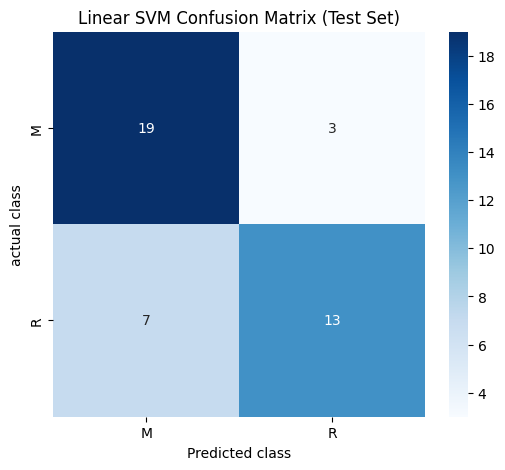

In [17]:
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm_linear, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    xticklabels=label_encoder.classes_, 
    yticklabels=label_encoder.classes_
)
plt.title('Linear SVM Confusion Matrix (Test Set)')
plt.ylabel('actual class')
plt.xlabel('Predicted class')
plt.show()

---
## 1.2. SVM with GridSearchCV and 5-Fold Cross-Validation (15 points)
---

## Create a Pipeline for GridSearchCV

In [18]:
tuned_svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(random_state=42)) 
])

print("Tuned SVM Pipeline (for GridSearchCV) created successfully")
print(tuned_svm_pipeline)

Tuned SVM Pipeline (for GridSearchCV) created successfully
Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(random_state=42))])


## Define the Parameter Grid for Different Kernels

In [19]:


param_grid_sonar = [
    #  linear kernel parameters
    {
        'svm__kernel': ['linear'],
        'svm__C': [0.1, 1, 10, 100] 
    },
    
    # RBF kernel Parameters 
    {
        'svm__kernel': ['rbf'],
        'svm__C': [0.1, 1, 10, 100],  # 
        'svm__gamma': ['scale', 'auto', 0.001, 0.01]  #
    },
    
    # polynomial kernel Parameters
    {
        'svm__kernel': ['poly'],
        'svm__C': [0.1, 1, 10], 
        'svm__gamma': ['scale', 'auto', 0.01],
        'svm__degree': [2, 3, 4]   
    }
]

print("SVM Parameter grid defined . all Combinations number : 47 combination. ")


SVM Parameter grid defined . all Combinations number : 47 combination. 


## Create Stratified 5-Fold Cross-Validation

In [20]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)



## Initialize and Run GridSearchCV on Training Data

In [21]:
grid_search_sonar = GridSearchCV(
    estimator=tuned_svm_pipeline,
    param_grid=param_grid_sonar,
    cv=skf,
    scoring='accuracy',
    verbose=3,
    n_jobs=-1  
)


grid_search_sonar.fit(X_train_sonar, y_train_sonar)

print("training done")

Fitting 5 folds for each of 47 candidates, totalling 235 fits
[CV 3/5] END ......svm__C=1, svm__kernel=linear;, score=0.667 total time=   0.0s
[CV 3/5] END ....svm__C=0.1, svm__kernel=linear;, score=0.667 total time=   0.0s
[CV 4/5] END ....svm__C=0.1, svm__kernel=linear;, score=0.758 total time=   0.0s
[CV 2/5] END ....svm__C=0.1, svm__kernel=linear;, score=0.818 total time=   0.0s
[CV 5/5] END ....svm__C=0.1, svm__kernel=linear;, score=0.788 total time=   0.0s
[CV 1/5] END ......svm__C=1, svm__kernel=linear;, score=0.735 total time=   0.0s
[CV 4/5] END ......svm__C=1, svm__kernel=linear;, score=0.697 total time=   0.0s
[CV 2/5] END ......svm__C=1, svm__kernel=linear;, score=0.818 total time=   0.0s
[CV 5/5] END ......svm__C=1, svm__kernel=linear;, score=0.758 total time=   0.0s
[CV 1/5] END .....svm__C=10, svm__kernel=linear;, score=0.735 total time=   0.0s
[CV 3/5] END .....svm__C=10, svm__kernel=linear;, score=0.667 total time=   0.0s
[CV 2/5] END .....svm__C=10, svm__kernel=linear

## Display Best Parameters and Cross-Validation Score

In [22]:
print(" best params and score")
print("Best Params:", grid_search_sonar.best_params_)
print(f"Best cv score: {grid_search_sonar.best_score_:.4f}")


best_svm_model_sonar = grid_search_sonar.best_estimator_

 best params and score
Best Params: {'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Best cv score: 0.8615


## Evaluate the Best Model on the Test Set

In [23]:
# Predict the labels for the sonar test set using the best model found by GridSearchCV
# The best_svm_model_sonar is the best_estimator_ from the search.
y_test_pred_tuned = best_svm_model_sonar.predict(X_test_sonar)

# Calculate the accuracy score on the test set
test_accuracy_tuned = accuracy_score(y_test_sonar, y_test_pred_tuned)

# Calculate the difference between the CV score (training performance) and the test score (generalization performance)
cv_score_tuned = grid_search_sonar.best_score_
performance_diff = cv_score_tuned - test_accuracy_tuned

# Display the results
print("--- Tuned SVM Model (GridSearchCV) Test Results ---")
print(f"Best Cross-Validation Score (CV Score - Training): {cv_score_tuned:.4f}")
print(f"Test Accuracy : {test_accuracy_tuned:.4f}")
print(f"Performance Difference (CV Score - Test Acc): {performance_diff:.4f}")

--- Tuned SVM Model (GridSearchCV) Test Results ---
Best Cross-Validation Score (CV Score - Training): 0.8615
Test Accuracy : 0.8810
Performance Difference (CV Score - Test Acc): -0.0195


## Display Top 5 Parameter Combinations

In [24]:
results_df = pd.DataFrame(grid_search_sonar.cv_results_)

In [25]:
top_5_results = results_df.sort_values(
    by='mean_test_score', 
    ascending=False
).head(5)

In [26]:

print("En İyi 5 Parametre Kombinasyonu ve CV Skoru")
display_cols = [
    'param_svm__kernel', 
    'param_svm__C', 
    'param_svm__gamma', 
    'param_svm__degree', 
    'mean_test_score'
]


print(top_5_results[display_cols].to_string(index=False, float_format="%.4f"))

En İyi 5 Parametre Kombinasyonu ve CV Skoru
param_svm__kernel  param_svm__C param_svm__gamma  param_svm__degree  mean_test_score
              rbf       10.0000            scale                NaN           0.8615
              rbf       10.0000             auto                NaN           0.8615
              rbf      100.0000             auto                NaN           0.8615
              rbf      100.0000            scale                NaN           0.8615
             poly       10.0000             auto             3.0000           0.8501


## Display Classification Report for Tuned SVM

In [27]:
report_tuned = classification_report(
    y_test_sonar, 
    y_test_pred_tuned, 
    target_names=label_encoder.classes_
)

print("Tuned Kernel SVM classification Report (Test Set) ---")
print(report_tuned)

Tuned Kernel SVM classification Report (Test Set) ---
              precision    recall  f1-score   support

           M       0.84      0.95      0.89        22
           R       0.94      0.80      0.86        20

    accuracy                           0.88        42
   macro avg       0.89      0.88      0.88        42
weighted avg       0.89      0.88      0.88        42



## Display Confusion Matrix for Tuned SVM

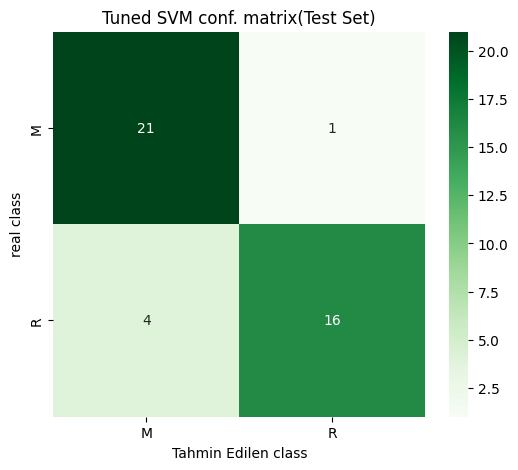

In [28]:
cm_tuned = confusion_matrix(y_test_sonar, y_test_pred_tuned)


plt.figure(figsize=(6, 5))
sns.heatmap(
    cm_tuned, 
    annot=True, 
    fmt='d', 
    cmap='Greens',
    xticklabels=label_encoder.classes_, 
    yticklabels=label_encoder.classes_
)
plt.title('Tuned SVM conf. matrix(Test Set)')
plt.ylabel('real class')
plt.xlabel('Tahmin Edilen class')
plt.show()

## Compare Linear SVM vs Tuned SVM Results. Compare experimental results. Explain the performance impact of linear and nonlinear kernels. Why is kernel trick important? Also explain why using k-fold cross validation is more advantageous than train-test split. (10 points)

In [29]:
"""
The experimental results on the Sonar dataset clearly show that hyperparameter tuning significantly improves performance. 
The basic Linear Kernel SVM achieved a Test Accuracy of 0.7619, which is acceptable but shows potential overfitting with a much higher 
Training Accuracy (0.9518). In contrast, the Tuned SVM (using the RBF kernel and optimized C, gamma) achieved a much better Test Accuracy of 0.8810. 
This jump in performance demonstrates the value of non-linear kernels, as the non-linear RBF kernel was better able to capture the complex structure of the data
than the simpler linear boundary. The Kernel Trick is vital here because it allows the RBF kernel to implicitly map the data into a high-dimensional space where a 
linear separation (a hyperplane) is possible, all without the computational cost of explicitly calculating those high-dimensional coordinates. 
Finally, k-fold cross-validation (used in GridSearchCV) is superior to a single train-test split because it uses all data points for both training 
and validation across multiple folds, providing a much more reliable and less biased estimate (the CV Score of 0.8615) of the model's true generalization ability.

"""

"\nThe experimental results on the Sonar dataset clearly show that hyperparameter tuning significantly improves performance. \nThe basic Linear Kernel SVM achieved a Test Accuracy of 0.7619, which is acceptable but shows potential overfitting with a much higher \nTraining Accuracy (0.9518). In contrast, the Tuned SVM (using the RBF kernel and optimized C, gamma) achieved a much better Test Accuracy of 0.8810. \nThis jump in performance demonstrates the value of non-linear kernels, as the non-linear RBF kernel was better able to capture the complex structure of the data\nthan the simpler linear boundary. The Kernel Trick is vital here because it allows the RBF kernel to implicitly map the data into a high-dimensional space where a \nlinear separation (a hyperplane) is possible, all without the computational cost of explicitly calculating those high-dimensional coordinates. \nFinally, k-fold cross-validation (used in GridSearchCV) is superior to a single train-test split because it uses 

---
# PART 2: MULTICLASS CLASSIFICATION (70 POINTS)
---

## Load the Dry Beans Dataset from UCI Repository

In [30]:
print("Loading Dry Beans dataset...")
dry_bean = fetch_ucirepo(id=602)
X_beans = dry_bean.data.features
y_beans = dry_bean.data.targets

Loading Dry Beans dataset...


## Encode the Target Labels using LabelEncoder

In [31]:
# LabelEncoder for  Bean dataset
label_encoder_beans = LabelEncoder()

# Fit the encoder to the target labels and transform them.
y_beans_encoded = label_encoder_beans.fit_transform(y_beans.iloc[:, 0])


print(" Bean Target Encoding Results ")
print("Original classes :", label_encoder_beans.classes_)
print("First 5 original labels:", y_beans.iloc[:5, 0].values)
print("First 5 encoded labels:", y_beans_encoded[:5])
print(f"Total unique classes: {len(label_encoder_beans.classes_)}")

 Bean Target Encoding Results 
Original classes : ['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']
First 5 original labels: ['SEKER' 'SEKER' 'SEKER' 'SEKER' 'SEKER']
First 5 encoded labels: [5 5 5 5 5]
Total unique classes: 7


## Split the Data into 80% Training and 20% Testing Sets

In [32]:

# X_beans: featuees (16 sütun)
# y_beans_encoded: encoded targets


X_train_beans, X_test_beans, y_train_beans, y_test_beans = train_test_split(
    X_beans, 
    y_beans_encoded, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_beans_encoded
)

print("--- bean data shapes ---")
print(f"X_train_beans shape: {X_train_beans.shape}")
print(f"X_test_beans shape: {X_test_beans.shape}")
print(f"y_train_beans shape: {y_train_beans.shape}")
print(f"y_test_beans shape: {y_test_beans.shape}")

--- bean data shapes ---
X_train_beans shape: (10888, 16)
X_test_beans shape: (2723, 16)
y_train_beans shape: (10888,)
y_test_beans shape: (2723,)


## Scale the Features using StandardScaler

In [33]:
# StandardScaler-fit only on train set
# to prevent Data Leakage use scaler just for train 
scaler_beans = StandardScaler()
X_train_beans_scaled = scaler_beans.fit_transform(X_train_beans)


X_test_beans_scaled = scaler_beans.transform(X_test_beans)


print(f"X_train_beans_scaled shape: {X_train_beans_scaled.shape}")
print(f"X_test_beans_scaled shape: {X_test_beans_scaled.shape}")

X_train_beans_scaled shape: (10888, 16)
X_test_beans_scaled shape: (2723, 16)


---
## 2.1. Multinomial Logistic Regression (20 points)
---

## Define the Multinomial Logistic Regression Class

In [ ]:

class MultinomialLogisticRegression:
    
    def __init__(self, learning_rate=0.01, epochs=300, reg_lambda=0.01):
        """
        Multinomial Logistic Regression modelini başlatır.
        
        Parametreler:
        - learning_rate (float): Gradyan inişi için öğrenme oranı.
        - epochs (int): Eğitim döngüsü sayısı.
        - reg_lambda (float): L2 regülarizasyon kuvveti.
        """
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.reg_lambda = reg_lambda
        # Ağırlıklar (W) ve bias (b) fit sırasında başlatılacaktır.
        self.W = None
        self.b = None
        self.n_classes = None

    def _softmax(self, Z):
        """
        Softmax aktivasyon fonksiyonunu hesaplar.
        """
        # Maksimum değeri çıkararak sayısal kararlılığı artır.
        exp_scores = np.exp(Z - np.max(Z, axis=1, keepdims=True))
        probabilities = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        return probabilities

    def _cross_entropy_loss(self, X, y, probabilities):
        """
        Çapraz Entropi (Cross-Entropy) kaybını L2 regülarizasyonu ile hesaplar.
        """
        N = X.shape[0] # Örnek sayısı
        
        # Gerçek sınıfı gösteren One-Hot kodlama matrisini oluştur
        y_one_hot = np.zeros((N, self.n_classes))
        y_one_hot[np.arange(N), y] = 1
        
        # Cross-Entropy Kaybı (Ortalama negatif log olasılığı)
        # Logaritma hatalarından kaçınmak için olasılıklara küçük bir değer eklenir (epsilon).
        epsilon = 1e-15
        loss = -np.sum(y_one_hot * np.log(probabilities + epsilon)) / N
        
        # L2 Regülarizasyonu (w'nin kare normu)
        loss += (self.reg_lambda / (2 * N)) * np.sum(self.W**2)
        
        return loss

    def fit(self, X, y):
        """
        Modeli gradyan inişi (gradient descent) kullanarak eğitir.
        """
        N, D = X.shape           # N: Örnek sayısı, D: Özellik sayısı
        self.n_classes = len(np.unique(y)) # Sınıf sayısı
        
        # Ağırlıkları ve bias'ı rastgele başlat
        # W boyutu: (D, n_classes), b boyutu: (1, n_classes)
        # Fasulye için (16, 7)
        self.W = np.random.randn(D, self.n_classes) * 0.01
        self.b = np.zeros((1, self.n_classes))
        
        # Gradyan İnişi 
        for epoch in range(self.epochs):
            # 1. Lineer Skorları Hesapla (Z = XW + b)
            Z = X @ self.W + self.b
            
            # 2. Softmax Olasılıklarını Hesapla (P)
            P = self._softmax(Z)
            
            # 3. Gradyanları Hesapla (Hata = P - y_one_hot)
            y_one_hot = np.zeros((N, self.n_classes))
            y_one_hot[np.arange(N), y] = 1
            
            error = P - y_one_hot
            
            
            # Gradyan w: (1/N) * X^T * Error
            dW = X.T @ error / N
            # Gradyan b: (1/N) * Sum(Error, axis=0)
            db = np.sum(error, axis=0, keepdims=True) / N
            
            # L2 Regülarizasyonu için Gradyan Terimi Ekle
            dW += (self.reg_lambda / N) * self.W
            
            # 4. Ağırlıkları Güncelle
            self.W -= self.learning_rate * dW
            self.b -= self.learning_rate * db
            
            # İsteğe bağlı: Her 50 epoch'ta bir kaybı yazdır (Gelişimi görmek için)
            # if (epoch + 1) % 50 == 0:
            #     loss = self._cross_entropy_loss(X, y, P)
            #     print(f"Epoch {epoch+1}/{self.epochs}, Loss: {loss:.6f}")

    def predict_proba(self, X):
        """
        Sınıf olasılıklarını döndürür (Softmax çıktısı).
        """
        Z = X @ self.W + self.b
        return self._softmax(Z)

    def predict(self, X):
        """
        En yüksek olasılığa sahip sınıfı döndürür.
        """
        probabilities = self.predict_proba(X)
        return np.argmax(probabilities, axis=1)

    def score(self, X, y):
        """
        Modelin doğruluk (accuracy) skorunu döndürür.
        """
        y_pred = self.predict(X)
        return np.mean(y_pred == y)
    
    # GridSearchCV uyumluluğu için gerekli metodlar
    def get_params(self, deep=True):
        return {
            'learning_rate': self.learning_rate, 
            'epochs': self.epochs, 
            'reg_lambda': self.reg_lambda
        }

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

## Define Hyperparameter Grid for Multinomial Logistic Regression

In [ ]:


param_grid_mlr = {
    # Gradyan inişinin hızını kontrol eder. Çok büyük değerler ıraksamaya (divergence) yol açabilir.
    'learning_rate': [0.01, 0.05, 0.1], 
    
    # Modelin tüm veri setini kaç kez göreceğini belirler. Fazla olması aşırı öğrenmeye yol açabilir.
    'epochs': [200, 300, 500],
    
    # L2 regülarizasyonunun gücünü kontrol eder. Aşırı öğrenmeyi önler. 0.0, regülarizasyon yok demektir.
    'reg_lambda': [0.0, 0.01, 0.1] 
}

print("Multinomial Logistic Regression Parametre Izgarası başarıyla tanımlandı.")
print(f"Toplam denenecek kombinasyon sayısı: {3 * 3 * 3} = 27 kombinasyon.")

Multinomial Logistic Regression Parametre Izgarası başarıyla tanımlandı.
Toplam denenecek kombinasyon sayısı: 27 = 27 kombinasyon.


## Run GridSearchCV for Multinomial Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV

# Multinomial Logistic Regression modelini başlat
mlr_model = MultinomialLogisticRegression()

# K-Fold CV stratejisini yeniden tanımlayalım (Fasulye verisi için)
# Veri seti büyük olduğu için 3 katlama kullanmak yeterli olabilir.
skf_beans = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


grid_search_mlr = GridSearchCV(
    estimator=mlr_model,
    param_grid=param_grid_mlr,
    cv=skf_beans,
    scoring='accuracy',
    verbose=2, # İşlemin ilerlemesini göster
    n_jobs=-1  # Tüm işlemci çekirdeklerini kullan
)

print("GridSearchCV başlatılıyor... Bu işlem zaman alabilir.")

# GridSearchCV'yi ölçeklenmiş eğitim verisi üzerinde çalıştır.
grid_search_mlr.fit(X_train_beans_scaled, y_train_beans)

print("GridSearchCV (Multinomial Logistic Regression) eğitimi tamamlandı.")

GridSearchCV başlatılıyor... Bu işlem zaman alabilir.
Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ....epochs=200, learning_rate=0.01, reg_lambda=0.01; total time=   0.2s
[CV] END .....epochs=200, learning_rate=0.01, reg_lambda=0.1; total time=   0.2s
[CV] END .....epochs=200, learning_rate=0.01, reg_lambda=0.0; total time=   0.3s
[CV] END .....epochs=200, learning_rate=0.01, reg_lambda=0.0; total time=   0.3s
[CV] END ....epochs=200, learning_rate=0.01, reg_lambda=0.01; total time=   0.3s
[CV] END ....epochs=200, learning_rate=0.01, reg_lambda=0.01; total time=   0.3s
[CV] END .....epochs=200, learning_rate=0.01, reg_lambda=0.0; total time=   0.3s
[CV] END .....epochs=200, learning_rate=0.01, reg_lambda=0.1; total time=   0.3s
[CV] END .....epochs=200, learning_rate=0.01, reg_lambda=0.1; total time=   0.2s
[CV] END ....epochs=200, learning_rate=0.05, reg_lambda=0.01; total time=   0.2s
[CV] END ....epochs=200, learning_rate=0.05, reg_lambda=0.01; total time=  

## Evaluate Multinomial Logistic Regression on Test Set

In [37]:

best_mlr_model = grid_search_mlr.best_estimator_



print("Best Parameters: ", grid_search_mlr.best_params_)
print(f"Best CV Score: {grid_search_mlr.best_score_:.4f}")

# predict on test set
y_test_pred_mlr = best_mlr_model.predict(X_test_beans_scaled)

# calculate accuracy 
test_accuracy_mlr = best_mlr_model.score(X_test_beans_scaled, y_test_beans)


print("\n--- Multinomial Logistic Regression Test Sonuçları ---")
print(f"Test Doğruluğu (Test Accuracy): {test_accuracy_mlr:.4f}")

Best Parameters:  {'epochs': 500, 'learning_rate': 0.1, 'reg_lambda': 0.01}
Best CV Score: 0.9170

--- Multinomial Logistic Regression Test Sonuçları ---
Test Doğruluğu (Test Accuracy): 0.9104


## Display Classification Report for Multinomial Logistic Regression

In [38]:

report_mlr = classification_report(
    y_test_beans, 
    y_test_pred_mlr, 
    target_names=label_encoder_beans.classes_
)

print("--- Multinomial Logistic Regression Sınıflandırma Raporu (Test Seti) ---")
print(report_mlr)

--- Multinomial Logistic Regression Sınıflandırma Raporu (Test Seti) ---
              precision    recall  f1-score   support

    BARBUNYA       0.96      0.86      0.91       265
      BOMBAY       1.00      0.99      1.00       104
        CALI       0.91      0.95      0.93       326
    DERMASON       0.90      0.91      0.91       709
       HOROZ       0.94      0.95      0.94       386
       SEKER       0.92      0.94      0.93       406
        SIRA       0.85      0.84      0.84       527

    accuracy                           0.91      2723
   macro avg       0.93      0.92      0.92      2723
weighted avg       0.91      0.91      0.91      2723



## Display Confusion Matrix for Multinomial Logistic Regression

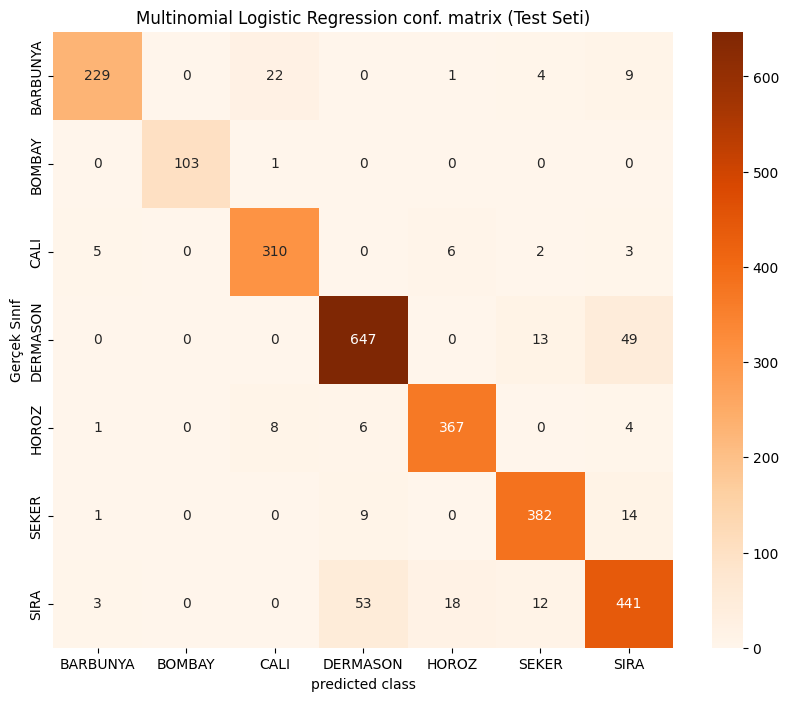

In [39]:
cm_mlr = confusion_matrix(y_test_beans, y_test_pred_mlr)

# Matrisi görselleştir
plt.figure(figsize=(10, 8)) 
sns.heatmap(
    cm_mlr, 
    annot=True, 
    fmt='d', 
    cmap='Oranges', 
    xticklabels=label_encoder_beans.classes_, 
    yticklabels=label_encoder_beans.classes_
)
plt.title('Multinomial Logistic Regression conf. matrix (Test Seti)')
plt.ylabel('Gerçek Sınıf')
plt.xlabel('predicted class')
plt.show()

---
## 2.2. Decision Tree (20 points)
---

###  Define the Decision Tree model. Use GridSearchCV to find the best hyperparameters. Perform multiclass classification on the Dry Beans dataset. Print best hyperparameters, classification report and confusion matrix. (15 points)

## Define Hyperparameter Grid for Decision Tree

In [40]:


param_grid_dt = {
    
    'max_depth': [10, 15, 20, 25, None],
    
    
    'min_samples_split': [2, 5, 10],
    
    
    'min_samples_leaf': [1, 2, 4],
    
    
    'criterion': ['gini', 'entropy'] 
}


print(f"number of try combinations  = 90 kombinasyon.")

number of try combinations  = 90 kombinasyon.


## Run GridSearchCV for Decision Tree

In [41]:

dt_model = DecisionTreeClassifier(random_state=42)

skf_beans_5fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search_dt = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid_dt,
    cv=skf_beans_5fold, # 5-fold CV kullanılıyor 
    scoring='accuracy',
    verbose=2, 
    n_jobs=-1  
)

print("desicion tree started ....")

desicion tree started ....


In [42]:
grid_search_dt.fit(X_train_beans_scaled, y_train_beans)

print("GridSearchCV (Decision Tree) training done ")

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END criterion=gini, max_depth=10, min_sam

## Display Classification Report for Decision Tree

In [43]:
from sklearn.metrics import classification_report, accuracy_score

# best model 
best_dt_model = grid_search_dt.best_estimator_


print("Best Parameters : ", grid_search_dt.best_params_)
print(f"Best CV Score: {grid_search_dt.best_score_:.4f}")

# predict on test set 
y_test_pred_dt = best_dt_model.predict(X_test_beans_scaled)

# accuracy 
test_accuracy_dt = accuracy_score(y_test_beans, y_test_pred_dt)


print("\nDecision Tree Test result")
print(f"Test Accuracy : {test_accuracy_dt:.4f}")


report_dt = classification_report(
    y_test_beans, 
    y_test_pred_dt, 
    target_names=label_encoder_beans.classes_
)

print("\n--- Decision Tree classification report  (Test Seti) ---")
print(report_dt)

Best Parameters :  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best CV Score: 0.9105

Decision Tree Test result
Test Accuracy : 0.8968

--- Decision Tree classification report  (Test Seti) ---
              precision    recall  f1-score   support

    BARBUNYA       0.89      0.87      0.88       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.92      0.90      0.91       326
    DERMASON       0.88      0.91      0.89       709
       HOROZ       0.94      0.95      0.94       386
       SEKER       0.93      0.95      0.94       406
        SIRA       0.83      0.80      0.81       527

    accuracy                           0.90      2723
   macro avg       0.91      0.91      0.91      2723
weighted avg       0.90      0.90      0.90      2723



## Display Confusion Matrix for Decision Tree

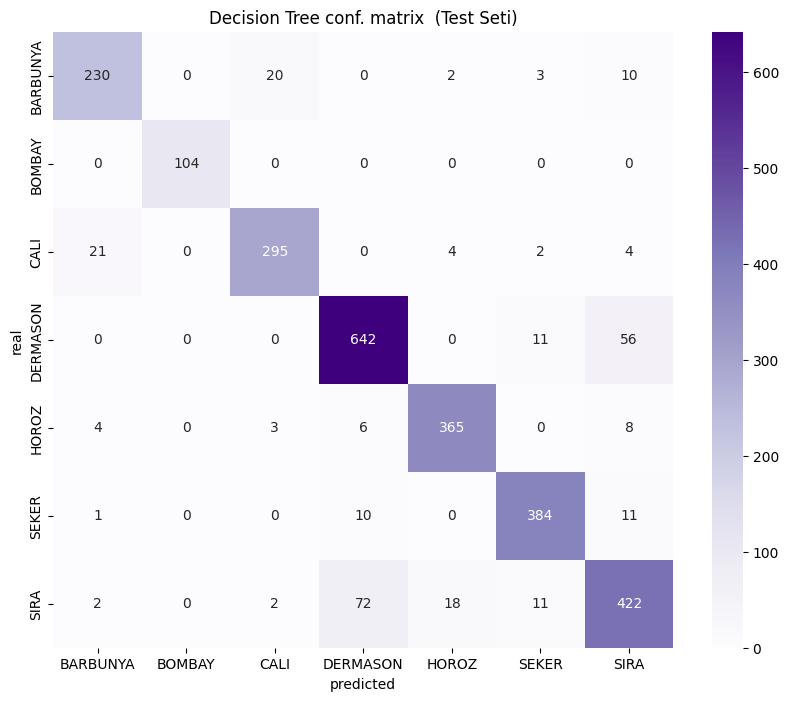

In [44]:
cm_dt = confusion_matrix(y_test_beans, y_test_pred_dt)

plt.figure(figsize=(10, 8)) 
sns.heatmap(
    cm_dt, 
    annot=True, 
    fmt='d', 
    cmap='Purples', 
    xticklabels=label_encoder_beans.classes_, 
    yticklabels=label_encoder_beans.classes_
)
plt.title('Decision Tree conf. matrix  (Test Seti)')
plt.ylabel('real')
plt.xlabel('predicted')
plt.show()

###  Describe how a decision tree builds its decision structure. (5 points)

In [45]:
"""
    A decision tree builds its structure through a process called recursive binary splitting, starting with the entire dataset at the root node. 
    At each node, the algorithm evaluates all possible splits on every feature to find the one that best separates the data into purer subsets; 
    this is typically measured by maximizing information gain or minimizing Gini impurity. The chosen feature and split point divide the data into two
    or more child nodes, effectively creating an if-then-else rule. This process repeats recursively on the child nodes until a stopping criterion is met,
    such as the nodes becoming sufficiently pure (containing data points mostly of one class) or reaching a maximum depth.
    The resulting end points are the leaf nodes, which assign the final prediction or decision.
 """

'\n    A decision tree builds its structure through a process called recursive binary splitting, starting with the entire dataset at the root node. \n    At each node, the algorithm evaluates all possible splits on every feature to find the one that best separates the data into purer subsets; \n    this is typically measured by maximizing information gain or minimizing Gini impurity. The chosen feature and split point divide the data into two\n    or more child nodes, effectively creating an if-then-else rule. This process repeats recursively on the child nodes until a stopping criterion is met,\n    such as the nodes becoming sufficiently pure (containing data points mostly of one class) or reaching a maximum depth.\n    The resulting end points are the leaf nodes, which assign the final prediction or decision.\n '

---
## 2.3. XGBoost (20 points)
---

###  Define the XGBoost model. Use GridSearchCV to find the best hyperparameters. Perform multiclass classification on the Dry Beans dataset. Print best hyperparameters, classification report and confusion matrix(10 points)

## Define Hyperparameter Grid for XGBoost

In [46]:
param_grid_xgb = {
    #ensemble size 
    'n_estimators': [100, 200, 300], 
    
    
    'learning_rate': [0.01, 0.1, 0.3],
    

    'max_depth': [3, 5, 7, 10],
    
    'subsample': [0.8, 1.0],
    
    'colsample_bytree': [0.8, 1.0] 
}


print(f"Toplam denenecek kombinasyon sayısı= 144 kombinasyon.")

Toplam denenecek kombinasyon sayısı= 144 kombinasyon.


## Run GridSearchCV for XGBoost

In [47]:



xgb_model = XGBClassifier(
    objective='multi:softprob', 
    eval_metric='mlogloss',      
    use_label_encoder=False, 
    random_state=42
)

skf_beans_5fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb, 
    cv=skf_beans_5fold,        
    scoring='accuracy',
    verbose=2, 
    n_jobs=-1  
)

print("GridSearchCV (XGBoost) started : ....")

#on scaled data 
grid_search_xgb.fit(X_train_beans_scaled, y_train_beans)

print("done :))")

GridSearchCV (XGBoost) started : ....
Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsa

## Evaluate XGBoost on Test Set

In [48]:
best_xgb_model = grid_search_xgb.best_estimator_



print("Best Parameters :", grid_search_xgb.best_params_)
print(f"Best CV Score : {grid_search_xgb.best_score_:.4f}")


y_test_pred_xgb = best_xgb_model.predict(X_test_beans_scaled)


test_accuracy_xgb = accuracy_score(y_test_beans, y_test_pred_xgb)


print("\nresult")
print(f"Test Accuracy : {test_accuracy_xgb:.4f}")

Best Parameters : {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.8}
Best CV Score : 0.9318

result
Test Accuracy : 0.9251


## Display Classification Report for XGBoost

In [49]:
report_xgb = classification_report(
    y_test_beans, 
    y_test_pred_xgb, 
    target_names=label_encoder_beans.classes_
)

print( "XGBoost classification report  (Test Set) ")
print(report_xgb)

XGBoost classification report  (Test Set) 
              precision    recall  f1-score   support

    BARBUNYA       0.94      0.90      0.92       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.94      0.94      0.94       326
    DERMASON       0.91      0.93      0.92       709
       HOROZ       0.97      0.95      0.96       386
       SEKER       0.95      0.96      0.95       406
        SIRA       0.87      0.87      0.87       527

    accuracy                           0.93      2723
   macro avg       0.94      0.93      0.94      2723
weighted avg       0.93      0.93      0.93      2723



## Display Confusion Matrix for XGBoost

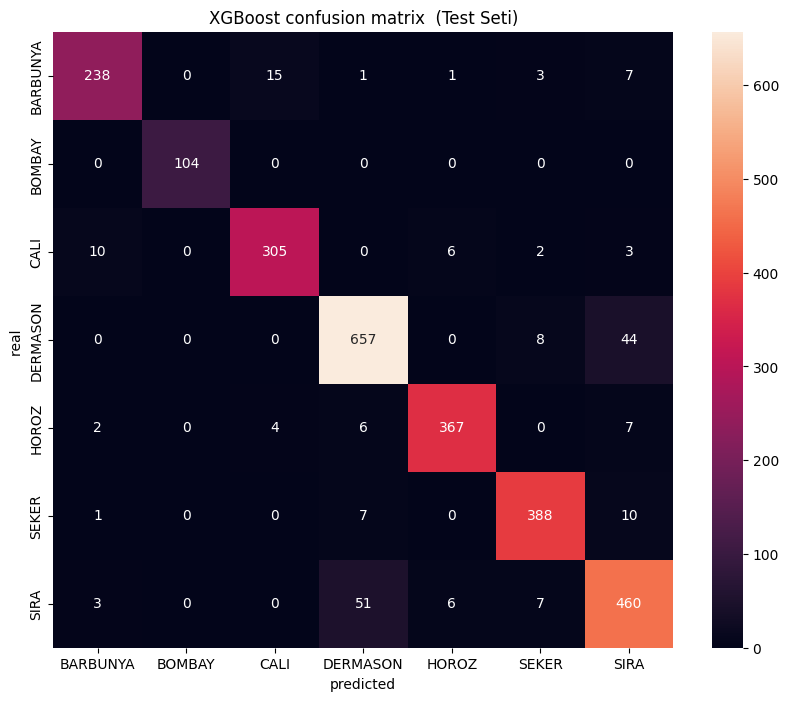

In [50]:
cm_xgb = confusion_matrix(y_test_beans, y_test_pred_xgb)

# Matrisi görselleştirme
plt.figure(figsize=(10, 8)) 
sns.heatmap(
    cm_xgb, 
    annot=True, 
    fmt='d', 
    xticklabels=label_encoder_beans.classes_, 
    yticklabels=label_encoder_beans.classes_
)
plt.title('XGBoost confusion matrix  (Test Seti)')
plt.ylabel('real ')
plt.xlabel('predicted')
plt.show()

### What are the revolutionary features of XGBoost compared to other tree-based models? (10 points)

In [ ]:


#The experimental results on  Dry Beans dataset clearly show that XGB is  superior model, achieving the highest overall test accuracy, followed by the Decision Tree, with Multinomial Logistic Regression (MLR) generally performing the weakest.
#  MLR is a relatively simplle, low complexit model with a lower risk of overfiting, making it fast to train and best suited forlinearly or near linearly separeble data. 
# However, it struggles to capture  complex, non-linear feature interactions present in  Dry Beans data. 
# The Decision Tree, being a medium complexity model, performs significantly better than MLR by creating non linear decision boundaries through recursive splitting, but its standalone nature makes it prone to high variance and overfitting if not heavily regularized.  Finally, XGBoost, as an advanced ensemble method, leverages the power of many weak decision trees trained sequentially to correct previous errors. 
# This architecture inherently supports high complexity and robustly mitigates  risk of overfitting (because of regularization and subsampling), making it the most effective model for achieving excellent accuracy in complex, high-dimensional datasets like this one
#  although it requires the longest training time due to its sequential and highly optimized nature.

###  Compare the classification results of your Multinomial Logistic Regression, Decision Tree, and XGBoost models on the Dry Beans dataset. Discuss the comparison in terms of overall model performance, risk of overfitting, model complexity and the scenarios in which each model is most effective. (10 points)

In [52]:
"""
Model	                                   Test Accuracy	Best Cross-Validation Score (Mean)

XGBoost	                                    0.9251	                0.9318
Multinomial Logistic Regression         	0.9111	                0.9169
Decision Tree	                            0.8968	                0.9105

-----------------------------------------------------------------------------------------------------------------------------------------------
XGBoost achieved the highest performance with a test accuracy of 0.9251. 
Its performance is robustly predicted by its high cross-validation (CV) score (0.9318), suggesting excellent generalization.

Multinomial Logistic Regression (MLR) performed second best (0.9111), suggesting that the dataset is largely, though not perfectly,
linearly separable in the scaled feature space.

Decision Tree (DT) showed the lowest performance (0.8968), highlighting the inherent instability and suboptimal predictive power of a single
decision tree on complex data compared to ensemble methods or optimized linear models.


-----------------------------------------------------------------------------------------------------------------------------------------------

MLR: This is a low-complexity model (linear). The small difference between its CV score (0.9169) and 
Test Accuracy (0.9111) suggests a very low risk of overfitting. However, its simplicity limits its ability to model complex, non-linear relationships, thus preventing it from reaching the highest accuracy.

DT: This is a medium-complexity model. The notable drop from its CV score (0.9105) to the Test Accuracy (0.8968) suggests a higher risk of 
overfitting compared to MLR, despite tuning. Decision Trees tend to learn very specific, jagged decision boundaries, making them prone to high variance.

XGBoost: As an advanced gradient boosting ensemble, it is a high-complexity model. However, its architecture (sequential fitting of weak learners) 
combined with built-in regularization and feature/data subsampling means it effectively manages this complexity. The minimal difference between 
its CV score (0.9318) and Test Accuracy (0.9251) confirms a low risk of overfitting while achieving the highest performance.


-----------------------------------------------------------------------------------------------------------------------------------------------


MLR: Most effective when the underlying data relationship is known to be linear or quasi-linear. It is valuable when 
interpretability and fast training/prediction are top priorities, as it is computationally inexpensive.

Decision Tree: Useful as a baseline model or for performing feature selection due to its inherent interpretability.
It's best suited for preliminary analysis or simpler datasets where speed is critical, and lower accuracy is acceptable.

XGBoost: The model of choice for high-accuracy multiclass classification on complex, non-linear datasets like this one.
It is highly effective when maximizing predictive performance is the main goal and is generally preferred for competitive machine learning due to 
its optimization and robustness.





"""

"\nModel\t                                   Test Accuracy\tBest Cross-Validation Score (Mean)\n\nXGBoost\t                                    0.9251\t                0.9318\nMultinomial Logistic Regression         \t0.9111\t                0.9169\nDecision Tree\t                            0.8968\t                0.9105\n\n-----------------------------------------------------------------------------------------------------------------------------------------------\nXGBoost achieved the highest performance with a test accuracy of 0.9251. \nIts performance is robustly predicted by its high cross-validation (CV) score (0.9318), suggesting excellent generalization.\n\nMultinomial Logistic Regression (MLR) performed second best (0.9111), suggesting that the dataset is largely, though not perfectly,\nlinearly separable in the scaled feature space.\n\nDecision Tree (DT) showed the lowest performance (0.8968), highlighting the inherent instability and suboptimal predictive power of a single\n